In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [ ]:
wine = pd.read_csv("https://bit.ly/wine_csv_data")
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [ ]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


##데이터 준비

In [ ]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

print(data.shape, target.shape)

(6497, 3) (6497,)


In [ ]:
train_input, test_input, train_target, test_target = train_test_split(
    data, target,
    test_size = 0.2,
    random_state = 42
)
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [ ]:
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

print(train_input[:5])
print(train_scaled[:5])

[[10.5   7.7   3.19]
 [12.4   2.1   3.26]
 [11.8   2.1   3.41]
 [11.7   1.2   3.37]
 [ 9.3  15.4   3.11]]
[[ 0.01376574  0.4646116  -0.16888369]
 [ 1.60871671 -0.70299854  0.26967864]
 [ 1.10504798 -0.70299854  1.20945505]
 [ 1.0211032  -0.89065017  0.958848  ]
 [-0.99357172  2.07007555 -0.67009777]]


로지스틱 회귀
  * 과소 적합

In [ ]:
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


In [ ]:
# 기울기와 절편 출력
print(lr.coef_, lr.intercept_)

# 알코올과 당도가 높을수록 화이트 와인일 가능성이 높고
# ph가 높을수록 레드 와인일 가능성이 높다

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


#의사결정트리

In [ ]:
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


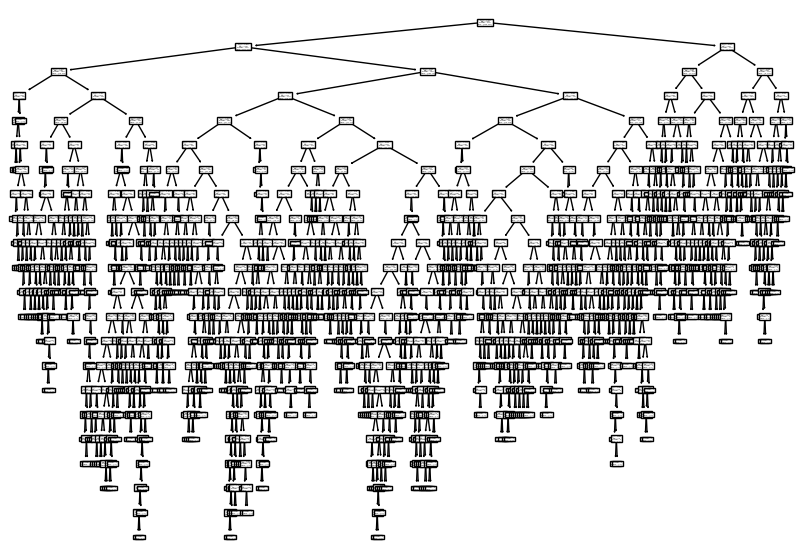

In [ ]:
plt.figure(figsize = (10, 7))
plot_tree(dt)
plt.show()

1. 루트 노드 = 음성 클래스(레드와인) 1258개, 양성 클래스(화이트와인) 3939개

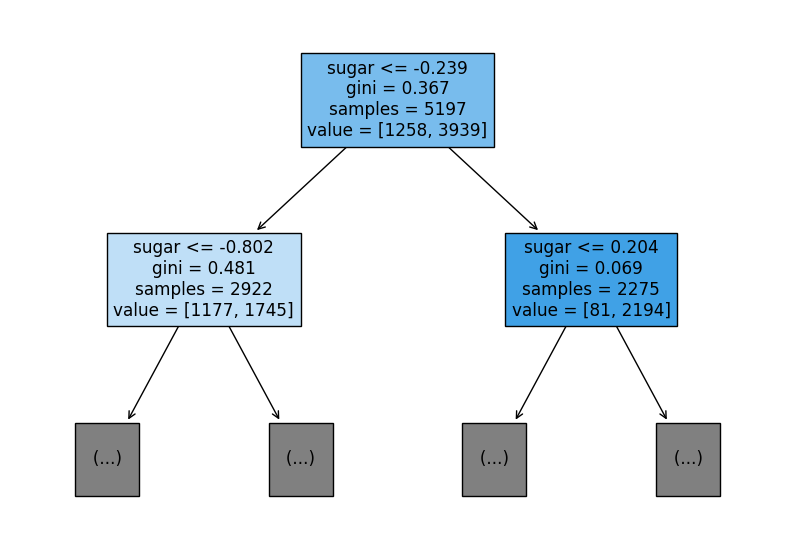

In [ ]:
plt.figure(figsize = (10, 7))
plot_tree(dt, max_depth = 1, filled = True, feature_names = ['alcohol', 'sugar', 'pH'])
plt.show()

"""
루트 노드
gini = 1 - ((1258 / 5197) ** 2 + (3939 / 5197) ** 2)

"""

## 지니 불순도 Gini impurity
* criterion 매개 변수의 기본 값 : gini
* criterion 매개 변수란 노드에서 데이터를 분할할 기준을 설정
* Gini impurity : 클래스의 비율을 제곱해서 더한 다음 1에서 빼면됨

# Entropy impurity
* log<sub>2</sub>를 사용하여 계산
*  -음성 클래스 비율 * log<sub>2</sub> -양성 클래스 비율 * log<sub>2</sub>

가지치기

In [ ]:
dt = DecisionTreeClassifier(max_depth = 3, random_state = 42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


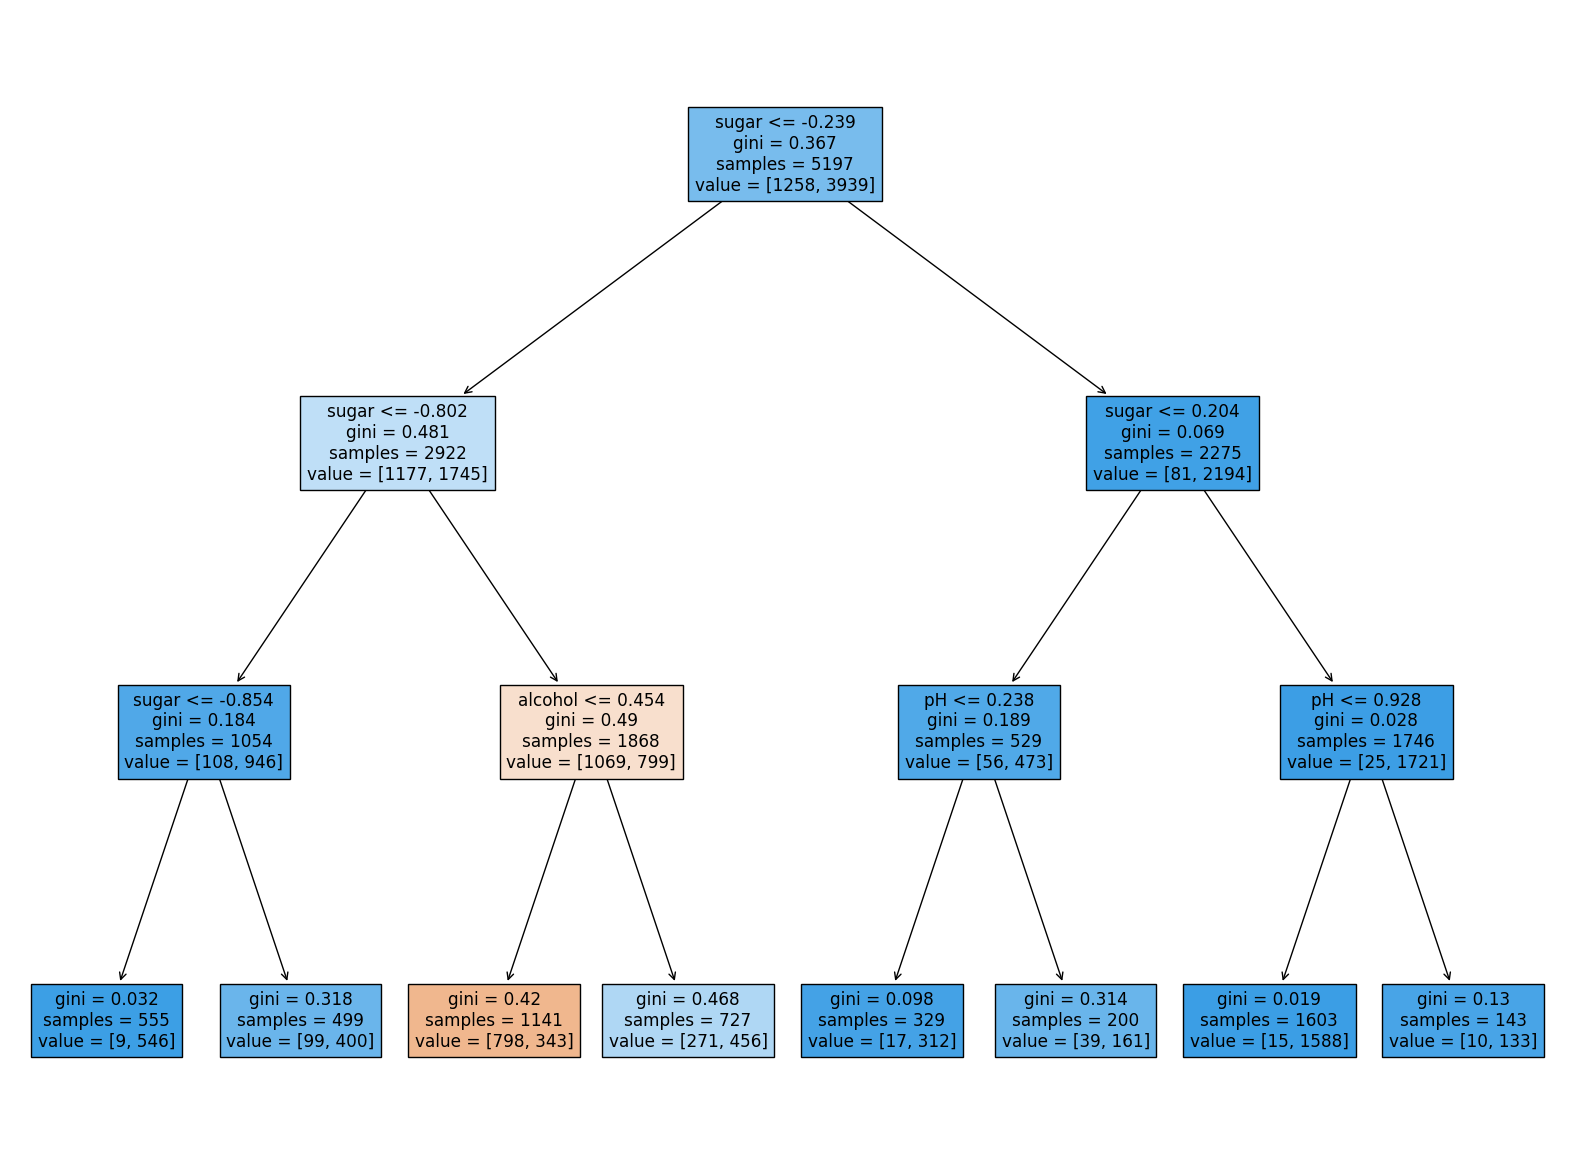

In [ ]:
plt.figure(figsize = (20, 15))
plot_tree(dt, filled = True, feature_names = ['alcohol', 'sugar', 'pH'])
plt.show()

In [ ]:
dt = DecisionTreeClassifier(max_depth = 3, random_state = 42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


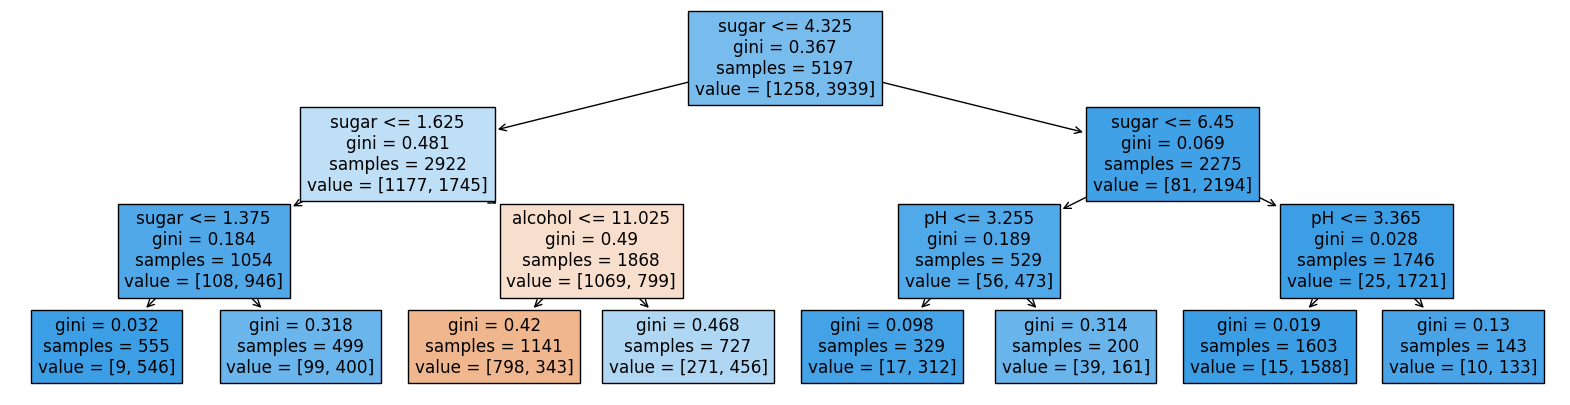

In [ ]:
plt.figure(figsize=(20, 5))
plot_tree(dt, filled = True, feature_names = ['alcohol', 'sugar', 'pH'])
plt.show()

In [ ]:
q0 = wine['sugar'] <= 4.325
q1 = wine['sugar'] > 1.625
q2 = wine['alcohol'] <= 11.025
q3 = wine['class'] == 1
wine[q0 & q1]

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0
...,...,...,...,...
6473,10.0,2.5,3.49,1.0
6475,11.6,2.5,3.36,1.0
6482,11.5,1.9,3.27,1.0
6486,13.0,1.9,3.04,1.0


In [ ]:
# 알코올, 당도, pH 순으로 중요하다는 것을 알 수 있다.
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]
